# Curve Mesh


`ospgrillage` allows curve mesh to be implemented. In this example we will explore the steps to define a curve mesh. In short, curve mesh are defined by setting defining a radius, `R` parameter. `ospgrillage` uses the radius along with the fundamental inputs (span, `L` and width ,`w` etc) to determine the curvature of the mesh (Figure 1).

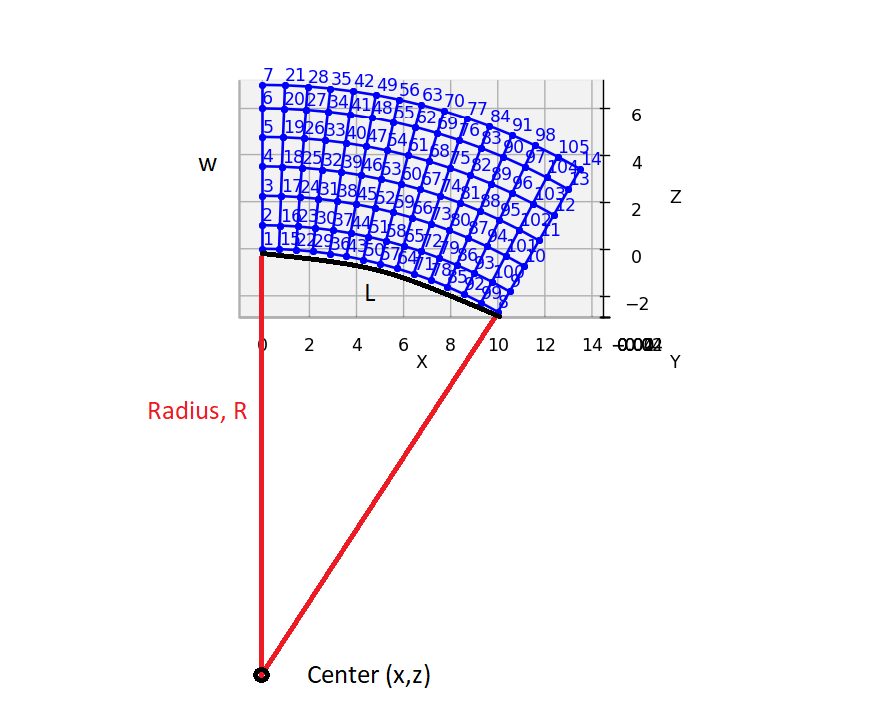

In [17]:
from IPython import display  # to display images in this notebook
display.Image("../images/curve_mesh_preview.PNG",width=800)

In this example, we create a single span bridge grillage model with span and width of 10 m and 7 m respectively. For demonstration purposes, the curve radius shall be 20 m. First, we begin with the necessary imports. 

In [1]:
import numpy as np
import ospgrillage as og 
%matplotlib inline

Then, we define the parameters of the grillage.

In [2]:
# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# parameters of bridge grillage
L = 10 * m  # span
w = 7 * m  # width
n_l = 7  # number of longitudinal members
n_t = 15  # number of transverse members
angle = 0 # degree
mesh_type = "Ortho"


Curve mesh requires the definition of radius.

In [19]:
mesh_radius = 20 * m

Define the materials and sections of the grillage similar to the standard workflow.

In [4]:
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A=1.025 * m2,
    J=0.1878 * m3,
    Iz=0.3694 * m4,
    Iy=0.113887e-3 * m4,
    Az=0.0371929 * m2,
    Ay=0.0371902 * m2,
)

transverse_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)

end_transverse_section = og.create_section(
    A=0.504 / 2 * m2,
    J=2.5012e-3 * m3,
    Iy=0.04116 * m4,
    Iz=0.6804e-3 * m4,
    Ay=0.21 * m2,
    Az=0.21 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)

At the `create_grillage` step, pass in the mesh radius to `mesh_radius=` keyword argument.

In [5]:

example_bridge = og.create_grillage(
    bridge_name="SuperT_10m",
    long_dim=L,
    width=w,
    skew=0,
    num_long_grid=n_l,
    num_trans_grid=n_t,
    mesh_type="Ortho",
    mesh_radius=mesh_radius,
)

Finally, we set the members accordingly, create the model and plot.

No Model_ODB specified, trying to get data from the active model.
3D model


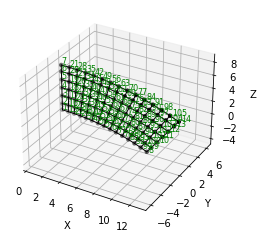

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='X', ylabel='Y'>)

In [8]:
example_bridge.set_member(longitudinal_beam, member="interior_main_beam")
example_bridge.set_member(longitudinal_beam, member="exterior_main_beam_1")
example_bridge.set_member(longitudinal_beam, member="exterior_main_beam_2")
example_bridge.set_member(edge_longitudinal_beam, member="edge_beam")
example_bridge.set_member(transverse_slab, member="transverse_slab")
example_bridge.set_member(end_transverse_slab, member="start_edge")
example_bridge.set_member(end_transverse_slab, member="end_edge")

example_bridge.create_osp_model(
    pyfile=False
)  
og.opsplt.plot_model("nodes")